In [33]:
import numpy
from numpy import *
import nltk
import scipy
from nltk.corpus import brown
from nltk.stem import SnowballStemmer
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
stemmer = SnowballStemmer('russian')
stopwords=nltk.corpus.stopwords.words('russian')

In [ ]:
docs =['group_1',
      'group_2',
      'group_3',
      'group_4',
      'group_5',
      'group_6',
      'group_7',
      'group_8',
      'group_9',
      'group_10']
# for ind in range(3):
#     with open(names[ind],'r') as f:
#         text = f.read()
#         docs.append(text)

In [ ]:
word=nltk.word_tokenize((' ').join(docs))
n=[stemmer.stem(w).lower() for w in word if len(w) >1 and w.isalpha()]
stopword=[stemmer.stem(w).lower() for w in stopwords]
fdist=nltk.FreqDist(n)
t=fdist.hapaxes()
d={};c=[] 

In [ ]:
for i in range(0,len(docs)):
    word=nltk.word_tokenize(docs[i])
    word_stem=[stemmer.stem(w).lower()  for w in word if len(w)>1 and  w.isalpha()]
    word_stop=[ w for w in word_stem if w not in stopword]
    words=[ w for w in word_stop if w not in t]
    for w in words:
        if w not in c:
            c.append(w)
            d[w]= [i]
        elif w in c:
            d[w]= d[w]+[i]
a=len(c); b=len(docs)
A = numpy.zeros([a,b])
c.sort()

In [ ]:
for i, k in enumerate(c):
    for j in d[k]:
        A[i,j] += 1
# TF-IDF нормализация матрицы А    
wpd = sum(A, axis=0)
dpw= sum(asarray(A > 0,'i'), axis=1)
rows, cols = A.shape
for i in range(rows):
    for j in range(cols):
             m=float(A[i,j])/wpd[j]
             n=log(float(cols) /dpw[i])
             A[i,j] =round(n*m,2)

In [ ]:
#Сингулярное разложение нормализованной матрицы А
U, S,Vt = numpy.linalg.svd(A)
rows, cols = U.shape
for j in range(0,cols):
           for i  in range(0,rows):
               U[i,j]=round(U[i,j],4)
print('Первые 2 столбца ортогональной матрицы U слов') 
for i, row in enumerate(U):
    print(c[i], row[0:2])
res1=-1*U[:,0:1]; 
res2=-1*U[:,1:2]
data_word=[]

In [ ]:
# Подготовка исходных данных в виде вложенных списков координат
for i in range(0,len(c)):
    data_word.append([res1[i][0],res2[i][0]])
plt.figure(figsize=(30,30))
plt.subplot(221)
# Вычисляется евклидово расстояние
dist = pdist(data_word, 'euclidean')
# Диаграмма евклидовых расстояний
plt.hist(dist, 500, color='green', alpha=0.5)

In [ ]:
# Выделение кластеров
Z = hierarchy.linkage(dist, method='average')
plt.subplot(222)
hierarchy.dendrogram(Z, labels=c, color_threshold=.25, leaf_font_size=20, count_sort=True,show_contracted = True, truncate_mode='lastp',orientation='right')
print('Первые 2 строки ортогональной матрицы Vt документов')
rows, cols = Vt.shape
for j in range(0,cols):
    for i  in range(0,rows):
        Vt[i,j]=round(Vt[i,j],4)
print(-1*Vt[0:2, :])
res3=(-1*Vt[0:1, :]);res4=(-1*Vt[1:2, :])
data_docs=[];name_docs=[]

In [ ]:
for i in range(0,len(docs)):
    name_docs.append(str(i))
    data_docs.append([res3[0][i],res4[0][i]])   
plt.subplot(223) 
dist = pdist(data_docs, 'euclidean')
plt.hist(dist, 500, color='green', alpha=0.5)
Z = hierarchy.linkage(dist, method='average')
plt.subplot(224)
hierarchy.dendrogram(Z, labels=name_docs, color_threshold=.25, leaf_font_size=8, count_sort=True)
plt.show()

In [ ]:
print('Первые 3 столбца ортогональной матрицы U слов') 
for i, row in enumerate(U):
    print(c[i], row[0:3])
res1=-1*U[:,0:1]; res2=-1*U[:,1:2];res3=-1*U[:,2:3]
data_word_xyz=[]
for i in range(0,len(c)):    
    data_word_xyz.append([res1[i][0],res2[i][0],res3[i][0]])
plt.figure(figsize=(30,30))
plt.subplot(221)
dist = pdist(data_word_xyz, 'euclidean')
plt.hist(dist, 500, color='green', alpha=0.5)
Z = hierarchy.linkage(dist, method='average')
plt.subplot(222)
hierarchy.dendrogram(Z, labels=c, color_threshold=.25, leaf_font_size=20, count_sort=True,show_contracted = True, truncate_mode='lastp',orientation='right')

In [ ]:
print('Первые 3 строки ортогональной матрицы Vt документов')
rows, cols = Vt.shape
for j in range(0,cols):
    for i  in range(0,rows):
        Vt[i,j]=round(Vt[i,j],4)
print(-1*Vt[0:3, :])
res3=(-1*Vt[0:1, :]);res4=(-1*Vt[1:2, :]);res5=(-1*Vt[2:3, :])
data_docs_xyz=[];name_docs_xyz=[]

In [ ]:
for i in range(0,len(docs)):
    name_docs_xyz.append(str(i))
    data_docs_xyz.append([res3[0][i],res4[0][i],res5[0][i]])   
plt.subplot(223) 
dist = pdist(data_docs_xyz, 'euclidean')
plt.hist(dist, 500, color='green', alpha=0.5)
Z = hierarchy.linkage(dist, method='average')
plt.subplot(224)
hierarchy.dendrogram(Z, labels=name_docs_xyz, color_threshold=.25, leaf_font_size=8, count_sort=True)
plt.show()

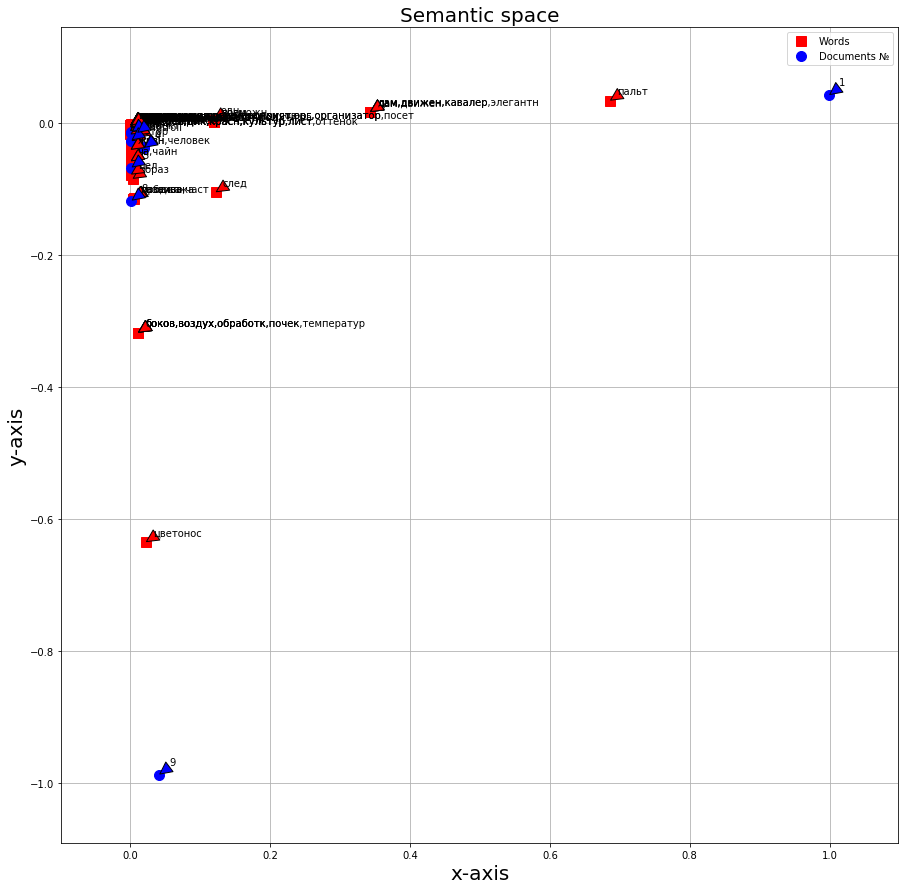

In [32]:
# Построение графика кластеризации
plt.figure(figsize = (15,15))
plt.title('Semantic space', size=20)
plt.xlabel('x-axis', size=20)
plt.ylabel('y-axis', size=20)
e1=(max(res1)-min(res1))/len(c)
e2=(max(res2)-min(res2))/len(c)
e3=(max(res3[0])-min(res3[0]))/len(docs)
e4=(max(res4[0])-min(res4[0]))/len(docs)
plt.axis([min(res1)-e1, max(res1)+e1, min(res2)-e2, max(res2)+e2])
plt.plot(res1, res2, color='r', linestyle=' ', marker='s',ms=10,label='Words')
plt.axis([min(res3[0])-e3, max(res3[0])+e3, min(res4[0])-e4, max(res4[0])+e4])
plt.plot(res3[0], res4[0], color='b', linestyle=' ', marker='o',ms=10,label='Documents №')
plt.legend(loc='best')
k={}
for i in range(0,len(res1)):
    xv=float(res1[i])
    yv=float(res2[i])
    if (xv,yv) not in k.keys():
        k[xv,yv]=c[i]
    elif (xv,yv) in k.keys():
        k[xv,yv]= k[xv,yv]+','+c[i]
    plt.annotate(k[xv,yv], xy=(res1[i], res2[i]), xytext=(res1[i]+0.01, res2[i]+0.01),arrowprops=dict(facecolor='red', shrink=0.1),)
k={}
for i in range(0,len(docs)):
    xv=float((res3[0])[i])
    yv=float((res4[0])[i])
    if (xv,yv) not in k.keys():
        k[xv,yv]=str(i)
    elif (xv,yv) in k.keys():
        k[xv,yv]= k[xv,yv]+','+str(i)
    plt.annotate(k[xv,yv], xy=((res3[0])[i], (res4[0])[i]), xytext=((res3[0])[i]+0.015, (res4[0])[i]+0.015),arrowprops=dict(facecolor='blue', shrink=0.1),)
plt.grid()
plt.show() 